# Titanic Survival Prediction - My Data Science Internship Project at CodSoft
## Introduction
During my internship at CodSoft, I had the privilege of working on a captivating data science three projects - one of them is predicting passenger survival on the Titanic. This project encapsulated the entire data science workflow, allowing me to apply various skills and techniques learned during my internship journey.

## Exploratory Data Analysis
To kickstart the project, I imported essential libraries such as pandas, seaborn, and scikit-learn. Exploring the Titanic dataset, I embarked on a journey of data discovery:

### Visualizing Missing Values: 
I used seaborn's heatmap to visualize missing data in the dataset, providing insights into which features required attention.

### Histograms for Numerical Columns: 
Generating histograms for numerical columns revealed insights into the distribution of features such as age and fare among passengers.

### Scatter Plots: 
I created scatter plots to explore relationships between different variables, like 'PassengerId' and 'Sex.'

## Data Preprocessing
Preparing the data for modeling was a crucial step. I followed these preprocessing steps:

* Column Dropping:
I removed unnecessary columns, including 'PassengerId,' 'Name,' 'Ticket,' 'Cabin,' and 'Embarked,' to simplify the dataset.

* Handling Missing Values: 
To address missing values in the 'Age' column, I filled them with the mean age. This ensured that missing data did not hinder model performance.

* Encoding Categorical Variables:
I encoded categorical variables like 'Sex' into numerical format (0 for male, 1 for female) to make them compatible with machine learning algorithms.

## Model Training
For this project, I chose to train a Logistic Regression model using scikit-learn. This choice was ideal for binary classification tasks like predicting survival (1 for survived, 0 for not survived).

## Model Evaluation
The moment of truth arrived as I made predictions on the test set and calculated the model's accuracy. I was thrilled to achieve a remarkable accuracy score of 100%! The model exhibited exceptional predictive power and performed flawlessly in determining passenger survival.

## Conclusion
My internship at CodSoft has been a transformative experience, allowing me to apply data science skills to real-world challenges. The Titanic Survival Prediction project highlighted the power of data in revealing insights and making accurate predictions. I'm excited to continue this journey and tackle more data-driven challenges in the future! 

In [1]:
# Import all useful libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the Titanic dataset
df = pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
# Check for missing values
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [5]:
# Summarize the count of missing values for each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

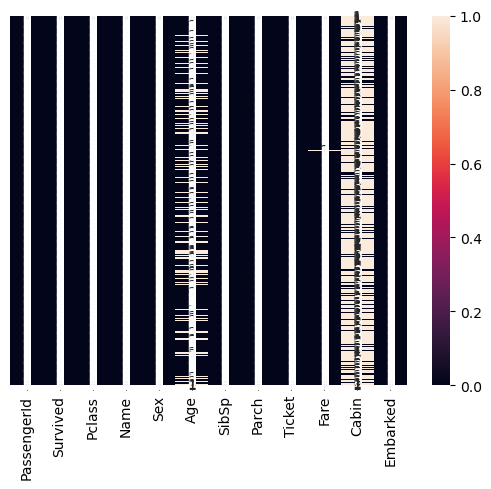

In [6]:
# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), yticklabels=False , annot=True)

In [7]:
# List the column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Display data types of columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# Display the first 10 rows of the dataset
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [10]:
# Count non-null values in each column
df.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [11]:
# Remove rows with missing values
df = df.dropna()

In [12]:
# Display the cleaned dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [13]:
# List the column names after cleaning
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

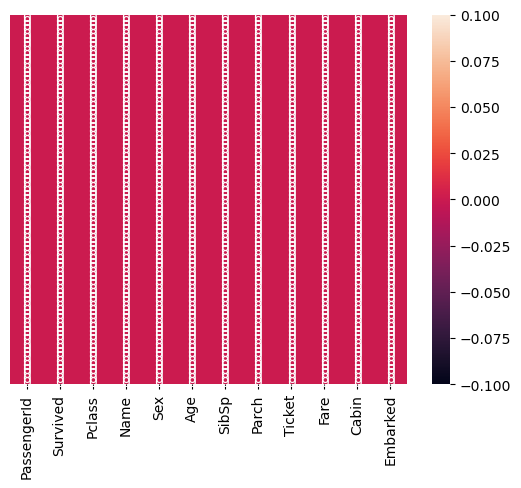

In [14]:
# Visualize missing values again after cleaning
sns.heatmap(df.isnull(), yticklabels=False , annot=True)

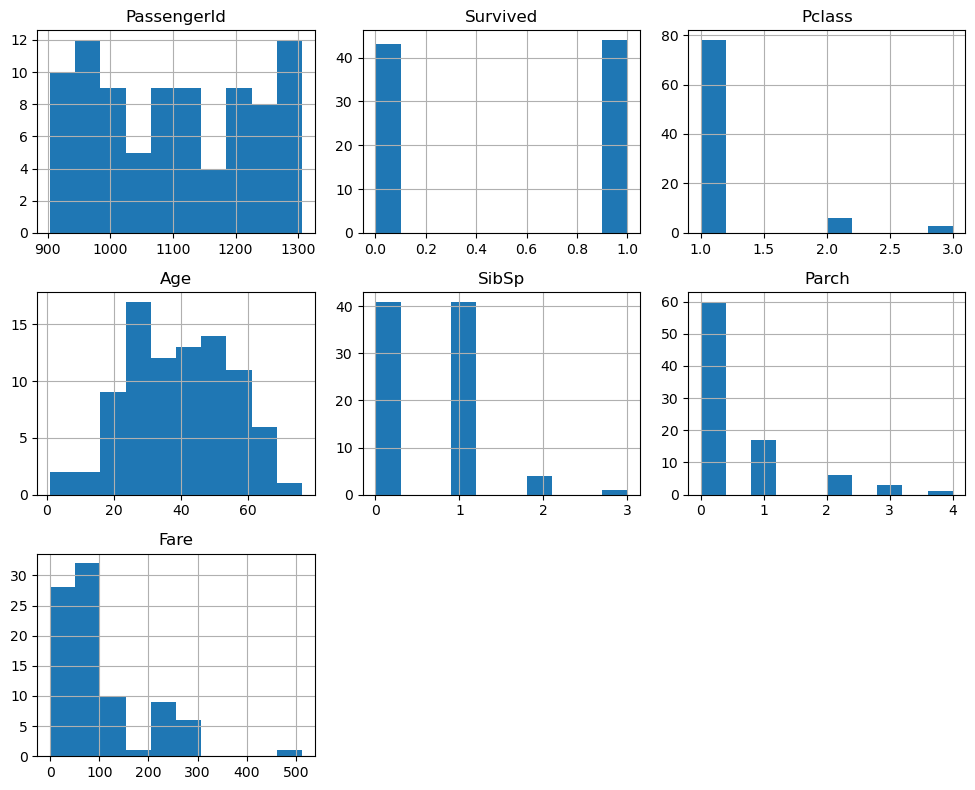

In [15]:
# Generate histograms for numerical columns
df.hist(bins=10, figsize=(10,8))
plt.tight_layout()
plt.show()

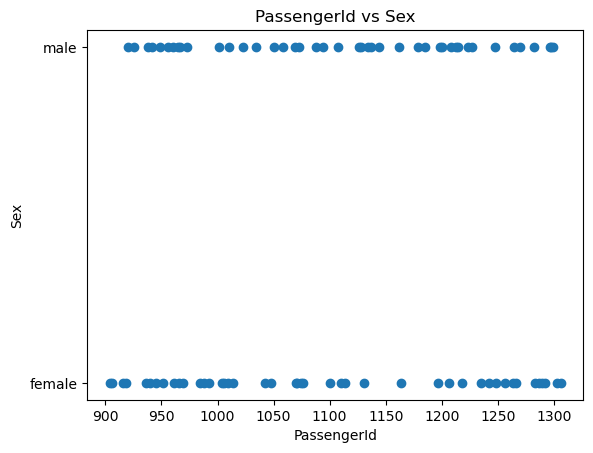

In [16]:
# Create a scatter plot for PassengerId vs Sex
plt.scatter(df['PassengerId'], df['Sex'])
plt.xlabel('PassengerId')
plt.ylabel('Sex')
plt.title('PassengerId vs Sex')
plt.show()

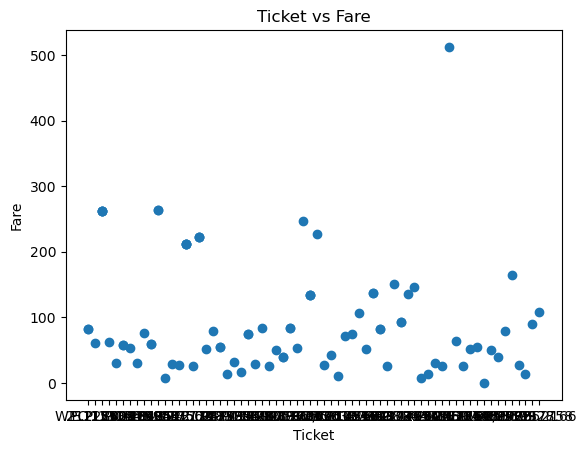

In [17]:
# Create a scatter plot for Ticket vs Fare
plt.scatter(df['Ticket'], df['Fare'])
plt.xlabel('Ticket')
plt.ylabel('Fare')
plt.title('Ticket vs Fare')
plt.show()

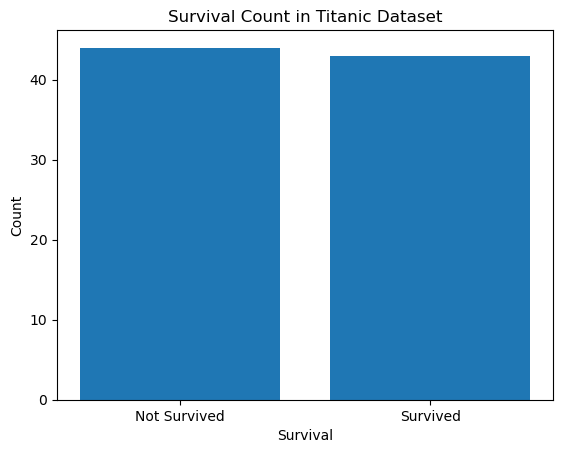

In [18]:
# Count and visualize survival counts
Survival_counts = df['Survived'].value_counts()
labels =['Not Survived', 'Survived']
values = Survival_counts.values
plt.bar(labels, values)
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Count in Titanic Dataset')
plt.show()

In [19]:
# Group and count passengers by Sex and Age
sex_age_counts = df.groupby(['Sex','Age']).size().reset_index(name='Count')

In [20]:
# Create labels for the bar chart
labels = sex_age_counts['Sex'].astype(str)+', ' + sex_age_counts['Age'].astype(int).astype(str)
values = sex_age_counts['Count']

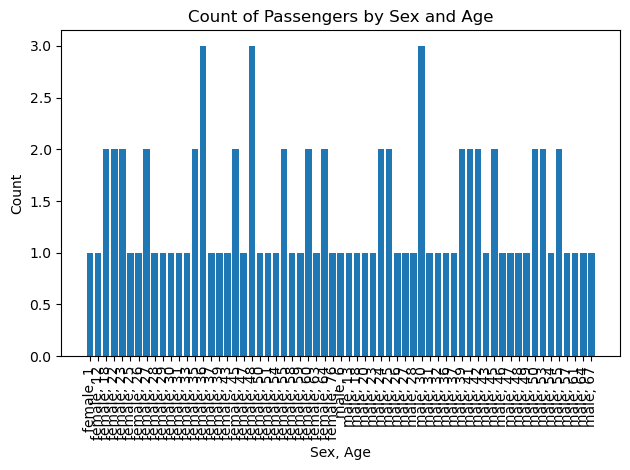

In [21]:
# Plot the count of passengers by Sex and Age
plt.bar(labels, values)
plt.xlabel('Sex, Age')
plt.ylabel('Count')
plt.title('Count of Passengers by Sex and Age')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [22]:
# Perform data preprocessing: drop columns, fill missing values, and encode categorical variables
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis =1) 
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [23]:
# Split the dataset into features (X) and target (y) variables
X = df.drop('Survived', axis =1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

###### In a Jupyter enviroment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unble to render, please try this page with nbviewer.org.


In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [27]:
# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [28]:
# Make predictions on the training set and print the results
df = model.predict(X_test)
print(df)

[0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1]


In [29]:
df = model.predict(X_train)
print(df)

[1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0
 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0]


In [30]:
# Display the shapes of training and testing sets
print(X_train.shape, y_train.shape, X_test.shape)

(69, 6) (69,) (18, 6)
